In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from collections import defaultdict
from scipy.optimize import curve_fit

In [2]:
#constants
G = 6.674e-11
HubbleC = 67.8
radian = 206265
M_bol = 4.75
M_r = 4.76
Mass = 1.989e30

In [3]:
with open('ServDat.csv') as d:
    reader = csv.DictReader(d)
    dataTwo = [r for r in reader]
for i in dataTwo:
    for key in i:
        i[key] = float(i[key])

ra=[i['ra'] for i in dataTwo] 
dec=[i['dec'] for i in dataTwo]

In [4]:
data = np.genfromtxt('sqldatnonames.csv',delimiter=',', dtype = float)

ra = [row[8] for row in data]
dec = [row[9] for row in data]
z = [row[10] for row in data]


Text(0, 0.5, 'Declination')

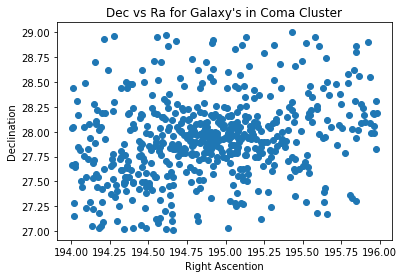

In [5]:
plt.scatter(ra,dec)
plt.title("Dec vs Ra for Galaxy's in Coma Cluster")
plt.xlabel("Right Ascention")
plt.ylabel("Declination")



In [6]:
#finding location of the center of the cluster
lengthra = len(ra)
sumra = sum(ra)
weighted_ra = sumra/lengthra

lengthdec = len(dec)
sumdec = sum(dec)
weighted_dec = sumdec/lengthdec

print("The weighted average and center of the coma cluster is")
print('Weighted Ra')
print(weighted_ra)
print('Weighted Dec')
print(weighted_dec)

The weighted average and center of the coma cluster is
Weighted Ra
194.89384287495605
Weighted Dec
27.926240208518525


The redshift of the coma cluster is
0.023404870891515817
The uncertainty in the redshift is
0.003474617017775726


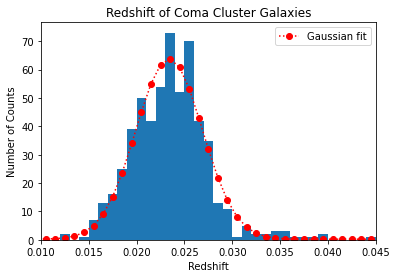

In [7]:
n1,bins1,patches1=plt.hist(z,bins=np.arange(0, 0.06 + 0.001, 0.001))
xdat=[(bins1[i]+bins1[i+1])/2 for i in range(bins1.shape[0]-1)]
ydat=n1

def gaussian(x,Ho,A,shift,sigma): 
    return Ho + A*np.exp(-(x-shift)**2 / (2*sigma**2))


def gaussian_fit(x,y): 
    m = sum(x*y)/sum(y)
    sigma = np.sqrt(sum(y*(x-m)**2)/sum(y))
    gfit,pcov = curve_fit(gaussian,x,y, p0=[min(y), max(y), m, sigma])
    return gfit

Ho,A,shift,sigma= gaussian_fit(xdat,ydat)
#redshift_coma=shift 
#uncertainty=sigma

plt.plot(xdat,gaussian(xdat, *gaussian_fit(xdat,ydat)),'ro:', label='Gaussian fit')
plt.legend()
plt.xlim(0.01,0.045)
plt.xlabel('Redshift')
plt.ylabel('Number of Counts')
plt.title('Redshift of Coma Cluster Galaxies')
print('The redshift of the coma cluster is')
print(shift)
print('The uncertainty in the redshift is')
print(sigma)

In [8]:
#Recessional velocity of coma cluster

velocity = shift*3e5
velocity_error = velocity*(sigma/shift)
print("The recessional velocity of the coma cluster is",velocity,"km/s +/-",velocity_error)


The recessional velocity of the coma cluster is 7021.461267454745 km/s +/- 1042.3851053327178


In [9]:
#distance to cluster
distance = velocity/HubbleC
distance_error = distance*(velocity_error/velocity)

print("The distance to the coma cluster is",distance,"+/-",distance_error,"Mpc")

The distance to the coma cluster is 103.56137562617619 +/- 15.374411583078434 Mpc


In [10]:
#radial distance

def radialdistance(rai,raf,deci,decf,dist):
    a = [deci,decf]
    seperation_center_ra = ((raf-rai)*np.cos(np.mean(a)))*3600
    seperation_center_dec = ((decf-deci)*3600)
    radiusf = (np.sqrt(seperation_center_ra**2 +seperation_center_dec**2))*(dist*10**6)
    radiusi = radiusf*4.84814e-6
    return radian




In [11]:
radial_dist = []
for i in dataTwo:
    i['radialDistance'] = radialdistance(i['ra'],i['dec'],weighted_ra,weighted_dec,distance)

In [12]:
radialdat = []

for i in dataTwo:
    if i['radialDistance'] <= 1.5e6 and abs(shift-i['z']) <= (3*sigma):
        radialdat.append(i)
#print(radialdat)
#len(radialdat)
#len(dataTwo)

In [13]:
selectiveWeightedSum = [i['radialDistance'] for i in radialdat]
selectedDec = [i['dec']*i['radialDistance'] for i in radialdat]
selectedRa = [i['ra']*i['radialDistance'] for i in radialdat]
selectedShift = [i['z'] for i in radialdat]


In [14]:
selectedWeightedRa = sum(selectedRa)/sum(selectiveWeightedSum)
selectedWeightedDec = sum(selectedDec)/sum(selectiveWeightedSum)

print("the weighted sum of Ra is",selectedWeightedRa)
print("the weighted sum of dec is",selectedWeightedDec)

the weighted sum of Ra is 194.89216438589514
the weighted sum of dec is 27.93038311531645


In [15]:
def gaussian2(x,Ho,A,selectedShift,sigma2): 
    return Ho + A*np.exp(-(x-shift)**2 / (2*sigma2**2))


def gaussian_fit2(x,y): 
    m = sum(x*y)/sum(y)
    sigma2 = np.sqrt(sum(y*(x-m)**2)/sum(y))
    gfit,pcov = curve_fit(gaussian2,x,y, p0=[min(y), max(y), m, sigma2])
    return gfit

The redshift of the coma cluster is
0.02323417721518987
The uncertainty in the redshift is
0.0034910552455823633


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


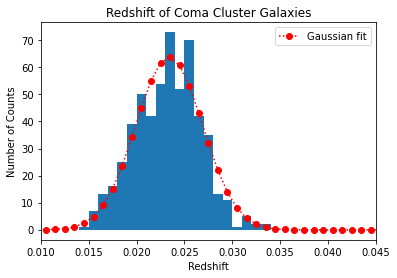

In [16]:
n2,bins2,patches2=plt.hist(selectedShift,bins=np.arange(0, 0.06 + 0.001, 0.001))
xdat2=[(bins2[i]+bins2[i+1])/2 for i in range(bins2.shape[0]-1)]
ydat2=n2

Ho,A,selectedShift,sigma2= gaussian_fit2(xdat2,ydat2)
shift2=selectedShift
# uncertainty2=sigma2#



plt.plot(xdat2,gaussian2(xdat2, *gaussian_fit(xdat2,ydat2)),'ro:', label='Gaussian fit')
plt.legend()
plt.xlim(0.01,0.045)
plt.xlabel('Redshift')
plt.ylabel('Number of Counts')
plt.title('Redshift of Coma Cluster Galaxies')
print('The redshift of the coma cluster is')
print(selectedShift)
print('The uncertainty in the redshift is')
print(sigma2)

In [17]:
velocity2 = selectedShift*3e5
print(velocity2)

distance2 = velocity2/HubbleC
print(distance2)

6970.253164556962
102.80609387252156


The redshift of the coma cluster is
0.023401955495051016
The uncertainty in the redshift is
0.0034910552455823633
the velocity is 7020.586648515305
103.54847564181865


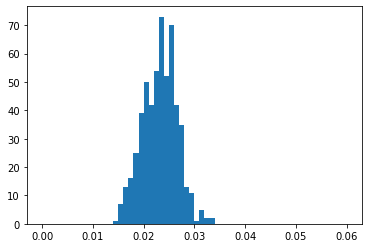

In [18]:
radialdat2 = []

# for i in dataTwo:
#     if i['radialDistance'] <= 1.5e6 and abs(shift-i['z']) <= (3*sigma):
#         radialdat.append(i)

for i in dataTwo:
    if i['radialDistance'] <= 1.5e6 and abs(selectedShift-i['z']) <= (3*sigma2):
        radialdat2.append(i)
#print('length of datatwo',len(radialdat2))
        
selectiveWeightedSum2 = [i['radialDistance'] for i in radialdat2]
selectedDec2 = [i['dec']*i['radialDistance'] for i in radialdat2]
selectedRa2 = [i['ra']*i['radialDistance'] for i in radialdat2]
selectedShift2 = [i['z'] for i in radialdat2]

selectedWeightedRa2 = sum(selectedRa2)/sum(selectiveWeightedSum2)
selectedWeightedDec2 = sum(selectedDec2)/sum(selectiveWeightedSum2)


def gaussian3(x,Ho,A,selectedShift2,sigma3): 
    return Ho + A*np.exp(-(x-selectedShift2)**2 / (2*sigma3**2))


def gaussian_fit3(x,y): 
    m = sum(x*y)/sum(y)
    sigma3 = np.sqrt(sum(y*(x-m)**2)/sum(y))
    gfit,pcov = curve_fit(gaussian3,x,y, p0=[min(y), max(y), m, sigma3])
    return gfit

n3,bins3,patches3=plt.hist(selectedShift2,bins=np.arange(0, 0.06 + 0.001, 0.001))
xdat3=[(bins2[i]+bins2[i+1])/2 for i in range(bins3.shape[0]-1)]
ydat3=n3

Ho,A,selectedShift2,sigma3= gaussian_fit3(xdat3,ydat3)
shift3=selectedShift2
# uncertainty2=sigma2#



# plt.plot(xdat3,gaussian3(xdat2, *gaussian_fit(xdat2,ydat2)),'ro:', label='Gaussian fit')
# plt.legend()
# plt.xlim(0.01,0.045)
# plt.xlabel('Redshift')
# plt.ylabel('Number of Counts')
# plt.title('Redshift of Coma Cluster Galaxies')
print('The redshift of the coma cluster is')
print(selectedShift2)
print('The uncertainty in the redshift is')
print(sigma2)

velocity3 = selectedShift2*3e5
print('the velocity is',velocity3)

distance3 = velocity3/HubbleC
print(distance3)

The redshift of the coma cluster is
0.023401955495051016
The uncertainty in the redshift is
0.0034914643685161274
the velocity is 7020.586648515305
the distanc is 103.54847564181865


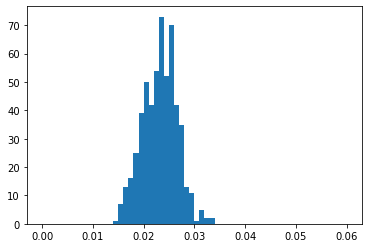

In [19]:
radialdat3 = []

# for i in dataTwo:
#     if i['radialDistance'] <= 1.5e6 and abs(shift-i['z']) <= (3*sigma):
#         radialdat.append(i)

for i in dataTwo:
    if i['radialDistance'] <= 1.5e6 and abs(selectedShift2-i['z']) <= (3*sigma3):
        radialdat3.append(i)
#print('length of datatwo',len(radialdat2))
        
selectiveWeightedSum3 = [i['radialDistance'] for i in radialdat3]
selectedDec3 = [i['dec']*i['radialDistance'] for i in radialdat3]
selectedRa3 = [i['ra']*i['radialDistance'] for i in radialdat3]
selectedShift3 = [i['z'] for i in radialdat3]

selectedWeightedRa3 = sum(selectedRa3)/sum(selectiveWeightedSum3)
selectedWeightedDec3 = sum(selectedDec3)/sum(selectiveWeightedSum3)


def gaussian4(x,Ho,A,selectedShift3,sigma4): 
    return Ho + A*np.exp(-(x-selectedShift3)**2 / (2*sigma4**2))


def gaussian_fit4(x,y): 
    m = sum(x*y)/sum(y)
    sigma4 = np.sqrt(sum(y*(x-m)**2)/sum(y))
    gfit,pcov = curve_fit(gaussian4,x,y, p0=[min(y), max(y), m, sigma4])
    return gfit

n4,bins4,patches4=plt.hist(selectedShift3,bins=np.arange(0, 0.06 + 0.001, 0.001))
xdat4=[(bins3[i]+bins3[i+1])/2 for i in range(bins4.shape[0]-1)]
ydat4=n4

Ho,A,selectedShift3,sigma4= gaussian_fit4(xdat4,ydat4)
shift4=selectedShift3
# uncertainty2=sigma2#



# plt.plot(xdat3,gaussian3(xdat2, *gaussian_fit(xdat2,ydat2)),'ro:', label='Gaussian fit')
# plt.legend()
# plt.xlim(0.01,0.045)
# plt.xlabel('Redshift')
# plt.ylabel('Number of Counts')
# plt.title('Redshift of Coma Cluster Galaxies')
print('The redshift of the coma cluster is')
print(selectedShift3)
print('The uncertainty in the redshift is')
print(sigma3)

velocity3 = selectedShift3*3e5
print('the velocity is',velocity3)

distance3 = velocity3/HubbleC
print('the distanc is',distance3)

The redshift of the coma cluster is
0.023401955495051016
The uncertainty in the redshift is
0.0034914643685161274
the velocity is 7020.586648515305
the distanc is 103.54847564181865


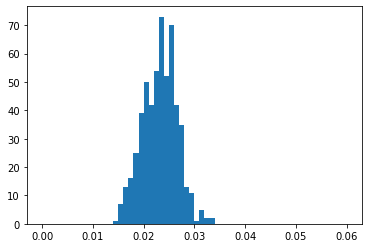

In [20]:
radialdat4 = []

# for i in dataTwo:
#     if i['radialDistance'] <= 1.5e6 and abs(shift-i['z']) <= (3*sigma):
#         radialdat.append(i)

for i in dataTwo:
    if i['radialDistance'] <= 1.5e6 and abs(selectedShift3-i['z']) <= (3*sigma4):
        radialdat4.append(i)
#print('length of datatwo',len(radialdat2))
        
selectiveWeightedSum4 = [i['radialDistance'] for i in radialdat4]
selectedDec4 = [i['dec']*i['radialDistance'] for i in radialdat4]
selectedRa4 = [i['ra']*i['radialDistance'] for i in radialdat4]
selectedShift4 = [i['z'] for i in radialdat4]

selectedWeightedRa4 = sum(selectedRa4)/sum(selectiveWeightedSum4)
selectedWeightedDec4 = sum(selectedDec4)/sum(selectiveWeightedSum4)


def gaussian5(x,Ho,A,selectedShift4,sigma5): 
    return Ho + A*np.exp(-(x-selectedShift4)**2 / (2*sigma5**2))


def gaussian_fit5(x,y): 
    m = sum(x*y)/sum(y)
    sigma5 = np.sqrt(sum(y*(x-m)**2)/sum(y))
    gfit,pcov = curve_fit(gaussian5,x,y, p0=[min(y), max(y), m, sigma5])
    return gfit

n5,bins5,patches5=plt.hist(selectedShift4,bins=np.arange(0, 0.06 + 0.001, 0.001))
xdat5=[(bins4[i]+bins4[i+1])/2 for i in range(bins5.shape[0]-1)]
ydat5=n5

Ho,A,selectedShift4,sigma5= gaussian_fit5(xdat5,ydat5)
shift5=selectedShift4
# uncertainty2=sigma2#



# plt.plot(xdat3,gaussian3(xdat2, *gaussian_fit(xdat2,ydat2)),'ro:', label='Gaussian fit')
# plt.legend()
# plt.xlim(0.01,0.045)
# plt.xlabel('Redshift')
# plt.ylabel('Number of Counts')
# plt.title('Redshift of Coma Cluster Galaxies')
print('The redshift of the coma cluster is')
print(selectedShift4)
print('The uncertainty in the redshift is')
print(sigma4)

velocity4 = selectedShift4*3e5
print('the velocity is',velocity4)

distance4 = velocity4/HubbleC
print('the distanc is',distance4)

In [21]:
%pylab nbagg
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'member galaxies overplotted on original set')

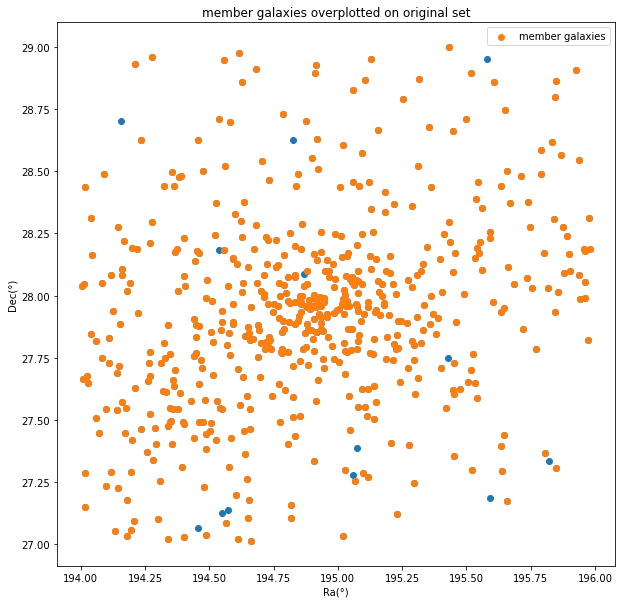

In [22]:
ra4=[i['ra'] for i in radialdat4]
dec4=[i['dec'] for i in radialdat4]

plt.figure(figsize=(10,10))
plt.scatter(ra,dec)
plt.scatter(ra4,dec4,label=('member galaxies'))
#circle1=plt.Circle((selectedRa4,selectedDec4),0.83, fill=False, linestyle='--')
#plt.Circle((selectedRa4,selectedDec4),0.83, fill=False, linestyle='--')
#fig = plt.gcf()
#ax = fig.gca()
#ax.add_artist(circle1)
plt.xlabel('Ra(°)')
plt.ylabel('Dec(°)')
plt.legend()
plt.title('member galaxies overplotted on original set')

In [23]:
# plt.figure(figsize=(10,10))
# n1,bins1,patches1=plt.hist(z,bins=np.arange(0, 0.06 + 0.001, 0.001), fill=False, label='original data')
# xdat=[(bins1[i]+bins1[i+1])/2 for i in range(bins1.shape[0]-1)]
# ydat=n1
# n5,bins5,patches5=plt.hist(selectedShift4,bins=np.arange(0, 0.06 + 0.001, 0.001),alpha=0.7,label='member galaxies')
# xdat5=[(bins4[i]+bins4[i+1])/2 for i in range(bins5.shape[0]-1)]
# ydat5=n5
# legend()
# plot(xdat,gaussian(xdat, *gaussian_fit(xdat,ydat)),'bo:', label='Gaussian fit')
# plot(xdat4,gaussian5(xdat5, *gaussian_fit5(xdat5,ydat5)),'ro:', label='Gaussian fit')
# xlabel('Redshift')
# ylabel('Histogram density')
# title('member galaxies redshift overplotted on original data')
# xlim(0,0.05)

# n1,bins1,patches1=plt.hist(z,bins=np.arange(0, 0.06 + 0.001, 0.001),fill=False,label='unsorted')
# xdat=[(bins1[i]+bins1[i+1])/2 for i in range(bins1.shape[0]-1)]
# ydat=n1

# def gaussian(x,Ho,A,shift,sigma): 
#     return Ho + A*np.exp(-(x-shift)**2 / (2*sigma**2))


# def gaussian_fit(x,y): 
#     m = sum(x*y)/sum(y)
#     sigma = np.sqrt(sum(y*(x-m)**2)/sum(y))
#     gfit,pcov = curve_fit(gaussian,x,y, p0=[min(y), max(y), m, sigma])
#     return gfit

# Ho,A,shift,sigma= gaussian_fit(xdat,ydat)
# #redshift_coma=shift 
# #uncertainty=sigma

# plt.plot(xdat,gaussian(xdat, *gaussian_fit(xdat,ydat)),'ro:', label='Gaussian fit')
# plt.legend()
# plt.xlim(0.01,0.045)
# plt.xlabel('Redshift')
# plt.ylabel('Number of Counts')
# plt.title('Redshift of Coma Cluster Galaxies')
# print('The redshift of the coma cluster is')
# print(shift)
# print('The uncertainty in the redshift is')
# print(sigma)


# selectiveWeightedSum4 = [i['radialDistance'] for i in radialdat4]
# selectedDec4 = [i['dec']*i['radialDistance'] for i in radialdat4]
# selectedRa4 = [i['ra']*i['radialDistance'] for i in radialdat4]
# selectedShift4 = [i['z'] for i in radialdat4]

# selectedWeightedRa4 = sum(selectedRa4)/sum(selectiveWeightedSum4)
# selectedWeightedDec4 = sum(selectedDec4)/sum(selectiveWeightedSum4)


# def gaussian5(x,Ho,A,selectedShift4,sigma5): 
#     return Ho + A*np.exp(-(x-selectedShift4)**2 / (2*sigma5**2))


# def gaussian_fit5(x,y): 
#     m = sum(x*y)/sum(y)
#     sigma5 = np.sqrt(sum(y*(x-m)**2)/sum(y))
#     gfit,pcov = curve_fit(gaussian5,x,y, p0=[min(y), max(y), m, sigma5])
#     return gfit

# n5,bins5,patches5=plt.hist(selectedShift4,bins=np.arange(0, 0.06 + 0.001, 0.001))
# xdat5=[(bins4[i]+bins4[i+1])/2 for i in range(bins5.shape[0]-1)]
# ydat5=n5

# Ho,A,selectedShift4,sigma5= gaussian_fit5(xdat5,ydat5)
# shift5=selectedShift4
# # uncertainty2=sigma2#


